In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [2]:
# Load the Excel file
file_path = "C:/Users/patha/OneDrive/Desktop/internships/vervebridge/task 2/DATASET/All Places Census 2016 Population Estimates.xlsx"
data = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the dataset
data.head()

Geographic ID  GEOID 2 Geography, full name (City, State)  \
0  1620000US0100124   100124            Abbeville city, Alabama   
1  1620000US0100460   100460           Adamsville city, Alabama   
2  1620000US0100484   100484              Addison town, Alabama   
3  1620000US0100676   100676                Akron town, Alabama   
4  1620000US0100820   100820            Alabaster city, Alabama   

  April 1, 2010 - Census  April 1, 2010 - Estimates Base  \
0                   2688                            2688   
1                   4522                            4522   
2                    758                             756   
3                    356                             356   
4                  30352                           31066   

   Population Estimate (as of July 1) - 2010  \
0                                       2683   
1                                       4517   
2                                        754   
3                                        355   
4                                      31176   

   Population Estimate (as of July 1) - 2011  \
0                                       2685   
1                                       4495   
2                                        753   
3                                        345   
4                                      31362   

   Population Estimate (as of July 1) - 2012  \
0                                       2647   
1                                       4472   
2                                        748   
3                                        345   
4                                      31663   

   Population Estimate (as of July 1) - 2013  \
0                                       2631   
1                                       4447   
2                                        748   
3                                        342   
4                                      31960   

   Population Estimate (as of July 1) - 2014  \
0                                       2619   
1                                       4428   
2                                        747   
3                                        337   
4                                      32167   

   Population Estimate (as of July 1) - 2015  \
0                                       2616   
1                                       4395   
2                                        740   
3                                        337   
4                                      32751   

   Population Estimate (as of July 1) - 2016  
0                                       2603  
1                                       4360  
2                                        738  
3                                        334  
4                                      32948

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Geographic ID                                0
GEOID 2                                      0
Geography, full name (City, State)           0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0
Population Estimate (as of July 1) - 2013    0
Population Estimate (as of July 1) - 2014    0
Population Estimate (as of July 1) - 2015    0
Population Estimate (as of July 1) - 2016    0
dtype: int64


In [5]:
# Fill missing values with mean for numeric columns
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
print(data.isnull().sum())

Geographic ID                                0
GEOID 2                                      0
Geography, full name (City, State)           0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0
Population Estimate (as of July 1) - 2013    0
Population Estimate (as of July 1) - 2014    0
Population Estimate (as of July 1) - 2015    0
Population Estimate (as of July 1) - 2016    0
dtype: int64


In [6]:
# Summary statistics
print(data.describe())

            GEOID 2  April 1, 2010 - Estimates Base  \
count  1.951000e+04                    1.951000e+04   
mean   3.008271e+06                    9.909960e+03   
std    1.461650e+06                    8.012455e+04   
min    1.001240e+05                    0.000000e+00   
25%    1.857141e+06                    3.690000e+02   
50%    2.940709e+06                    1.147000e+03   
75%    4.202612e+06                    4.603250e+03   
max    5.686665e+06                    8.174962e+06   

       Population Estimate (as of July 1) - 2010  \
count                               1.951000e+04   
mean                                9.930210e+03   
std                                 8.028673e+04   
min                                 0.000000e+00   
25%                                 3.690000e+02   
50%                                 1.148000e+03   
75%                                 4.606000e+03   
max                                 8.192026e+06   

       Population Estimate (as of J

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


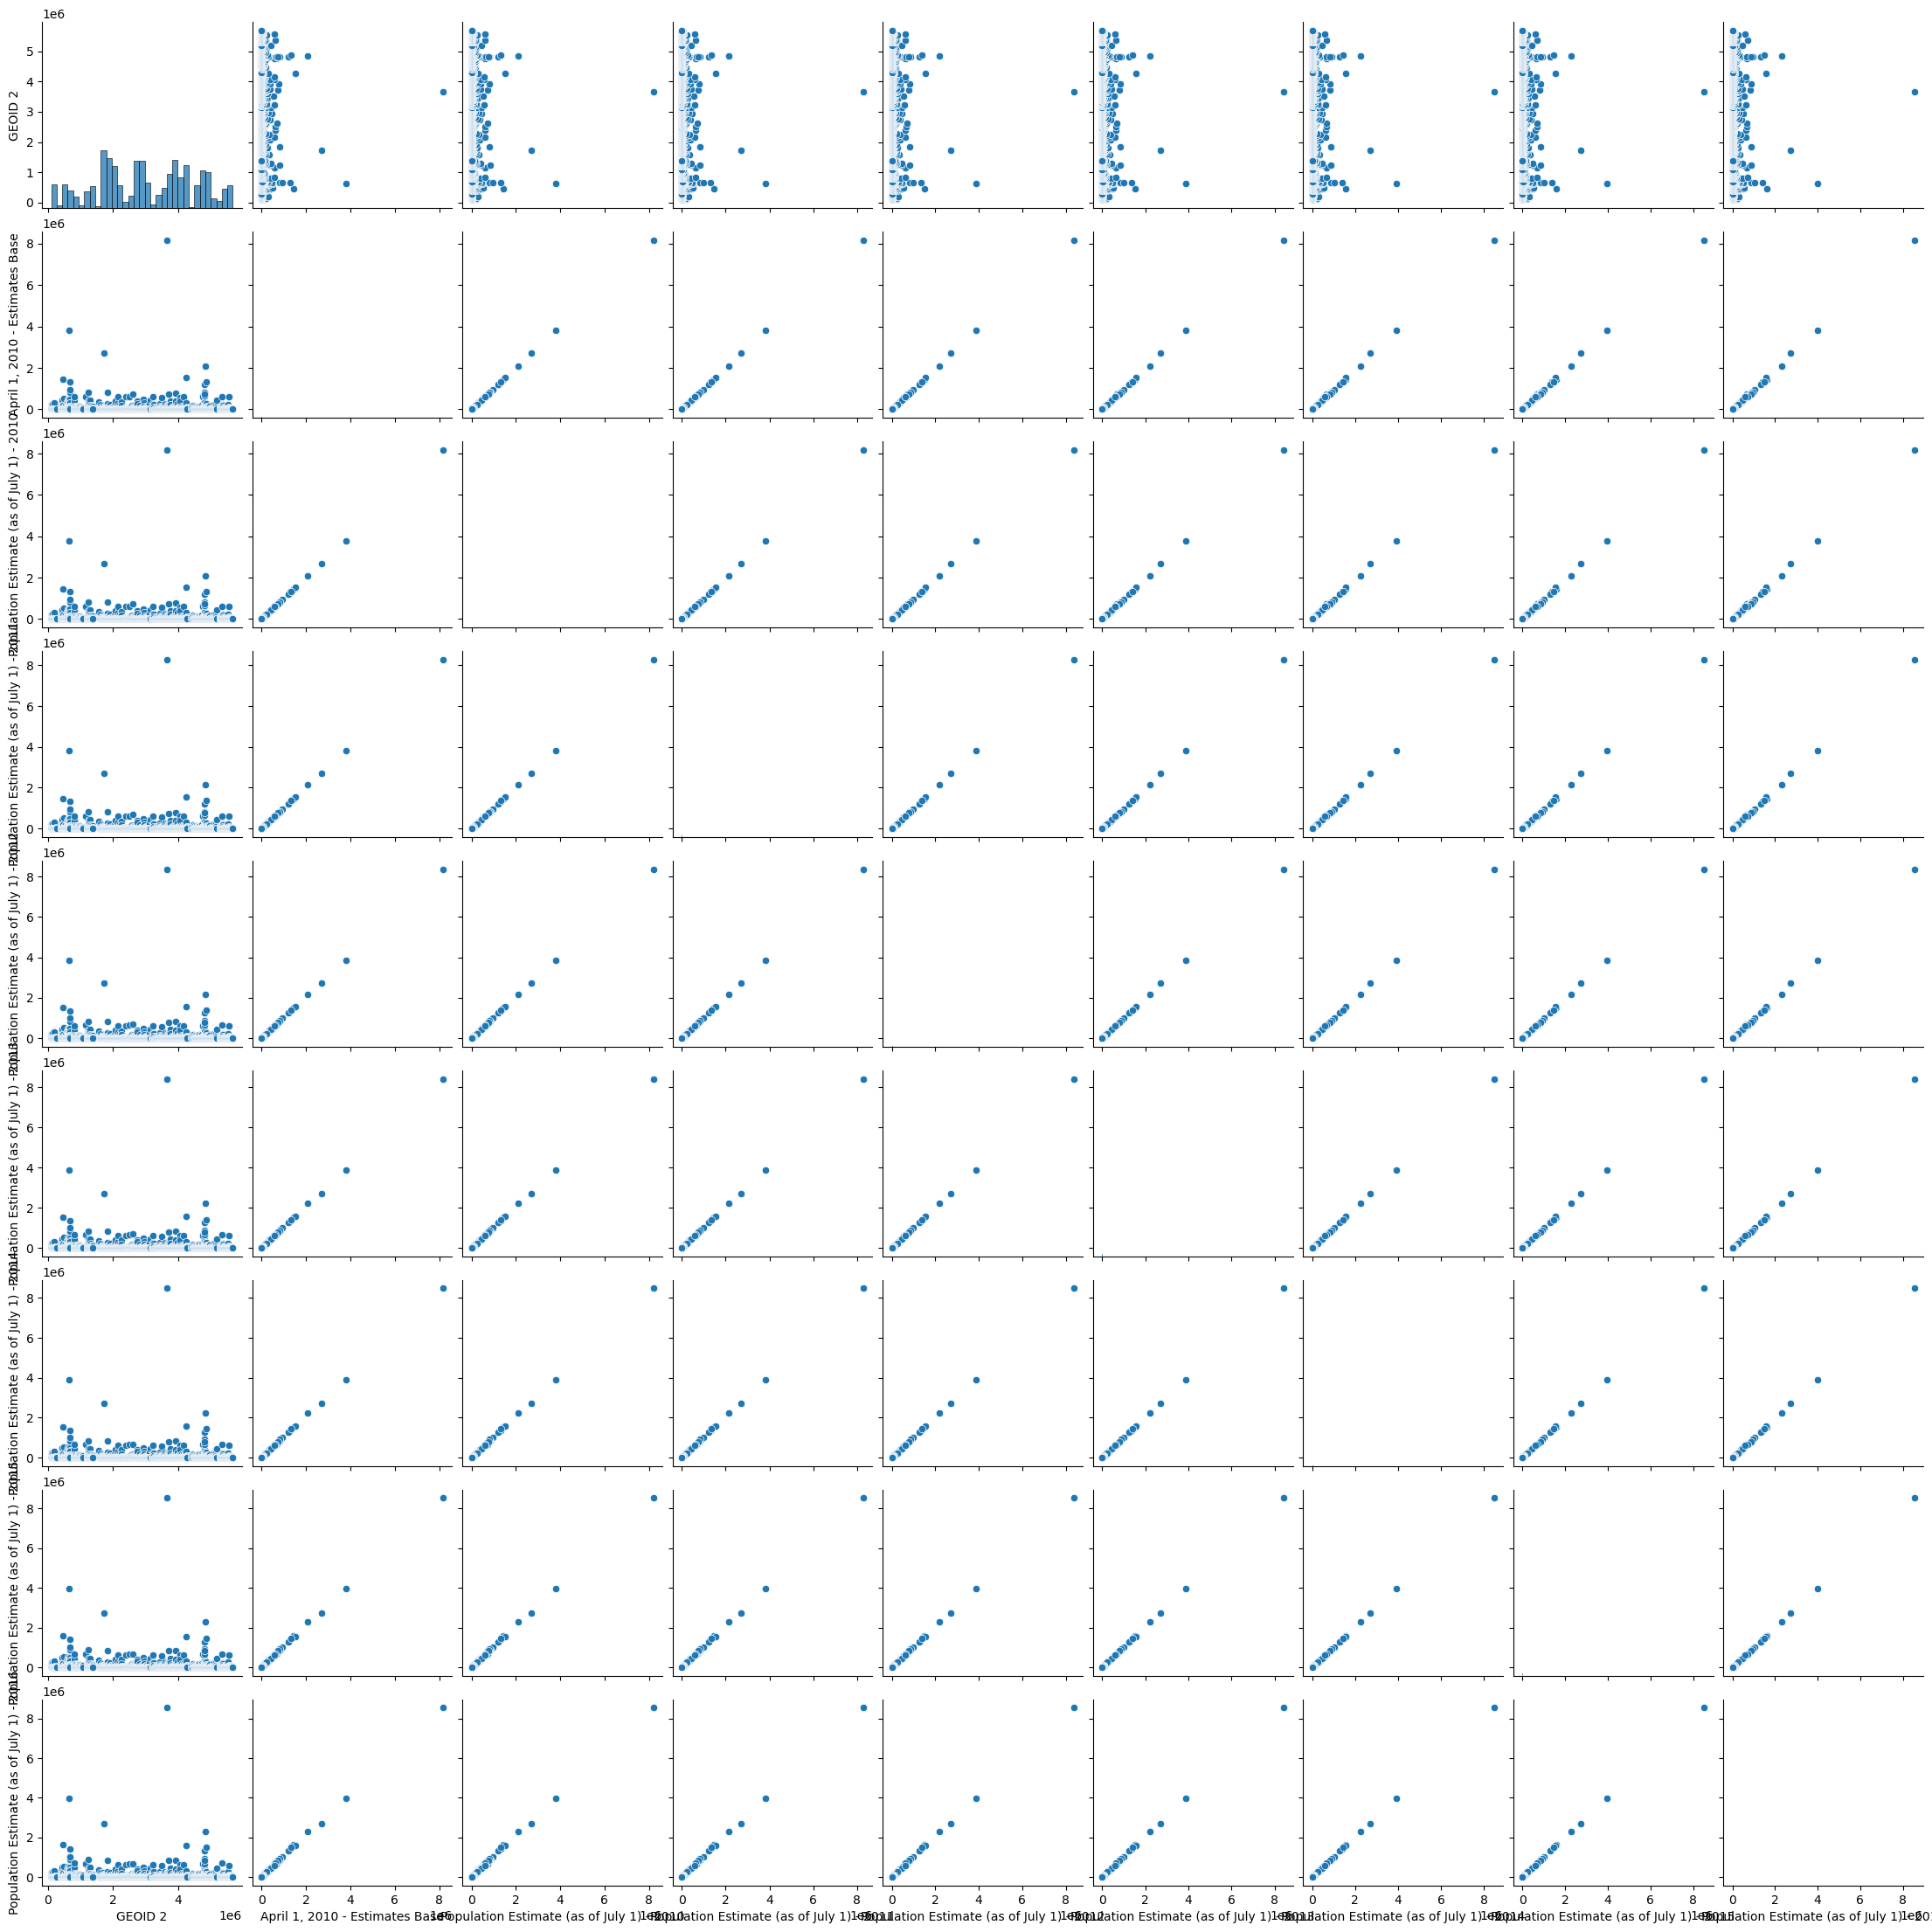

In [7]:
# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

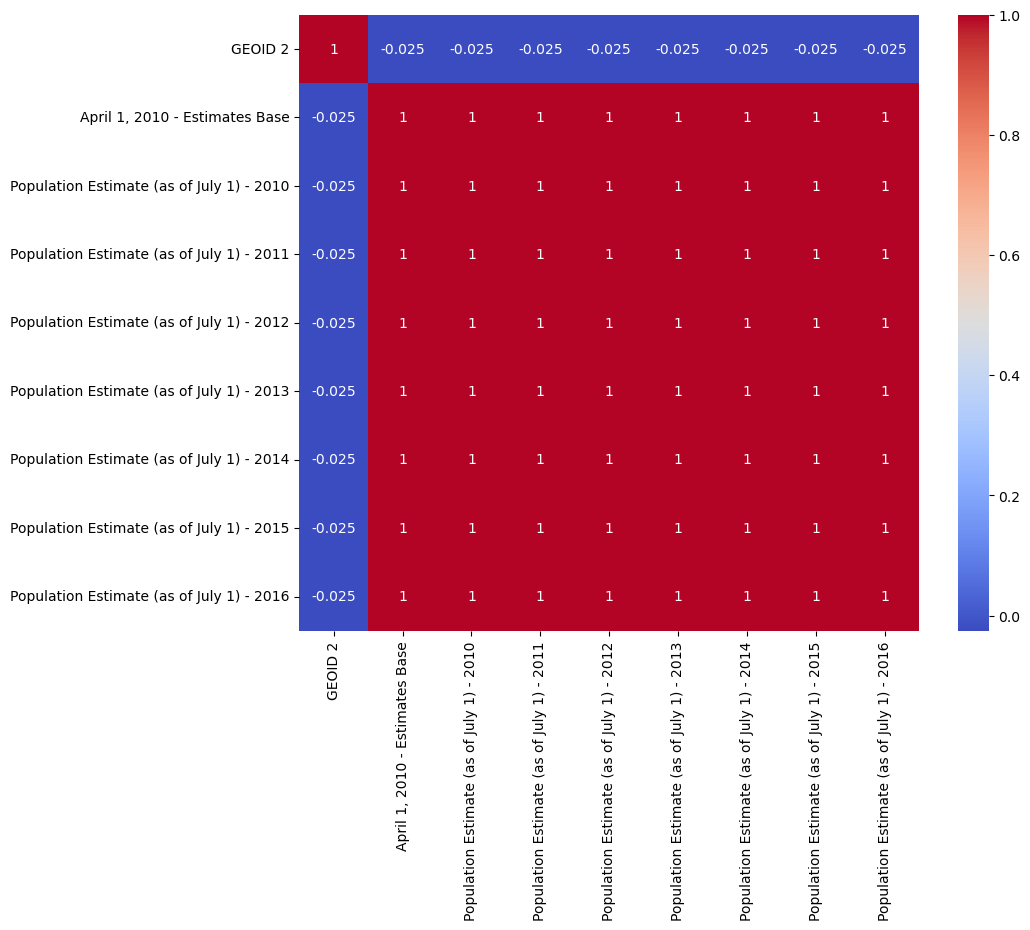

In [8]:
# Correlation Heatmap
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
print(data['Geography, full name (City, State)'].unique())

['Abbeville city, Alabama' 'Adamsville city, Alabama'
 'Addison town, Alabama' ... 'Worland city, Wyoming'
 'Wright town, Wyoming' 'Yoder town, Wyoming']


In [10]:
# Define the columns representing the population estimates by year
years = ['Population Estimate (as of July 1) - 2010', 'Population Estimate (as of July 1) - 2011',
         'Population Estimate (as of July 1) - 2012', 'Population Estimate (as of July 1) - 2013',
         'Population Estimate (as of July 1) - 2014', 'Population Estimate (as of July 1) - 2015',
         'Population Estimate (as of July 1) - 2016']
# Select top 10 locations by population in 2016
top_locations = data.nlargest(10, 'Population Estimate (as of July 1) - 2016')
top_population_trends = top_locations[['Geography, full name (City, State)'] + years]
# Set up the figure
plt.figure(figsize=(14, 8))


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

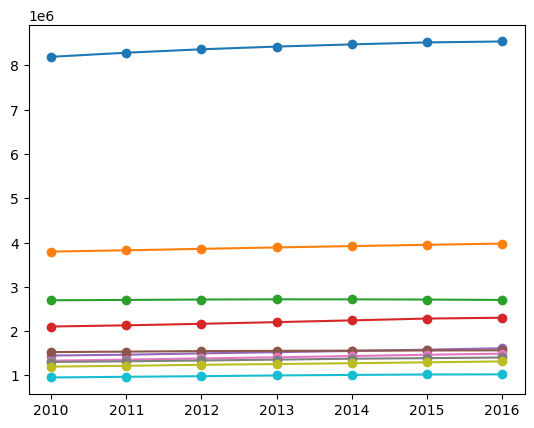

In [11]:
# Plot population trends for each top location
for index, row in top_population_trends.iterrows():
    location_name = row['Geography, full name (City, State)']
    population_values = row[years].values
    plt.plot([2010, 2011, 2012, 2013, 2014, 2015, 2016], population_values, marker='o', label=location_name)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


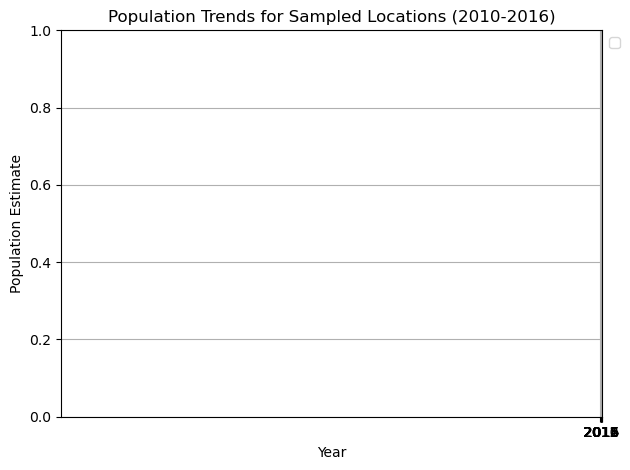

In [12]:
# Add labels and title
plt.title('Population Trends for Sampled Locations (2010-2016)')
plt.xlabel('Year')
plt.ylabel('Population Estimate')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
# Add a 'State' column by splitting the 'Geography, full name (City, State)' column
data['State'] = data['Geography, full name (City, State)'].apply(lambda x: x.split(', ')[-1])
# Aggregate the population data by state
state_population = data.groupby('State')[years].sum()
# Transpose the DataFrame to get years as rows for plotting
state_population = state_population.T
state_population.index = [year.split('- ')[1] for year in years] 


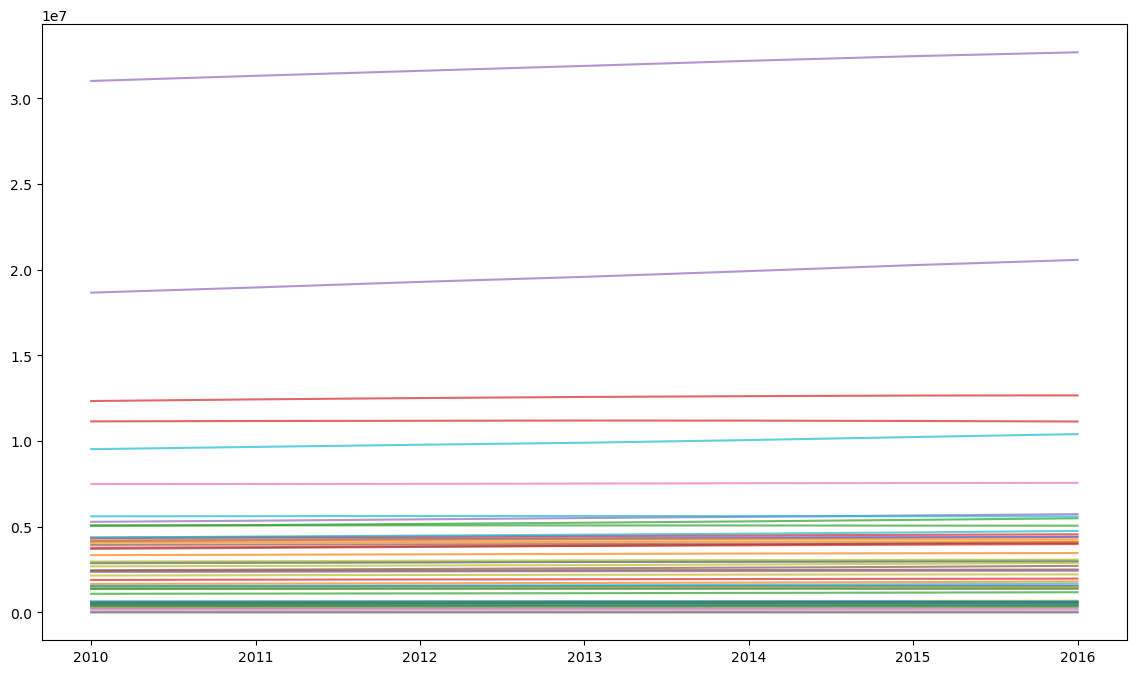

In [14]:
# Plot state-level population trends
plt.figure(figsize=(14, 8))
for state in state_population.columns:
    plt.plot(state_population.index, state_population[state], label=state, alpha=0.7)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


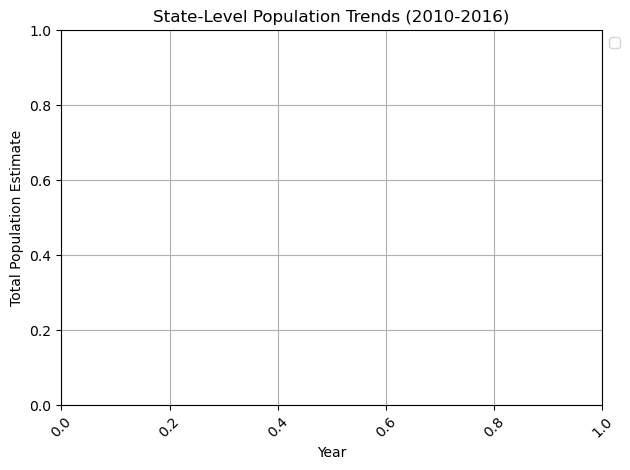

In [15]:
# Add labels and title
plt.title('State-Level Population Trends (2010-2016)')
plt.xlabel('Year')
plt.ylabel('Total Population Estimate')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
# Use Plotly to create an interactive bar chart
fig = px.bar(data, x='Geography, full name (City, State)', y='Population Estimate (as of July 1) - 2016',
             title="Population Distribution by Region (2016)", labels={
                 'Geography, full name (City, State)': 'Region',
                 'Population Estimate (as of July 1) - 2016': 'Population'
             })
fig.update_layout(xaxis_tickangle=-45, width=1000, height=600)

fig.show()

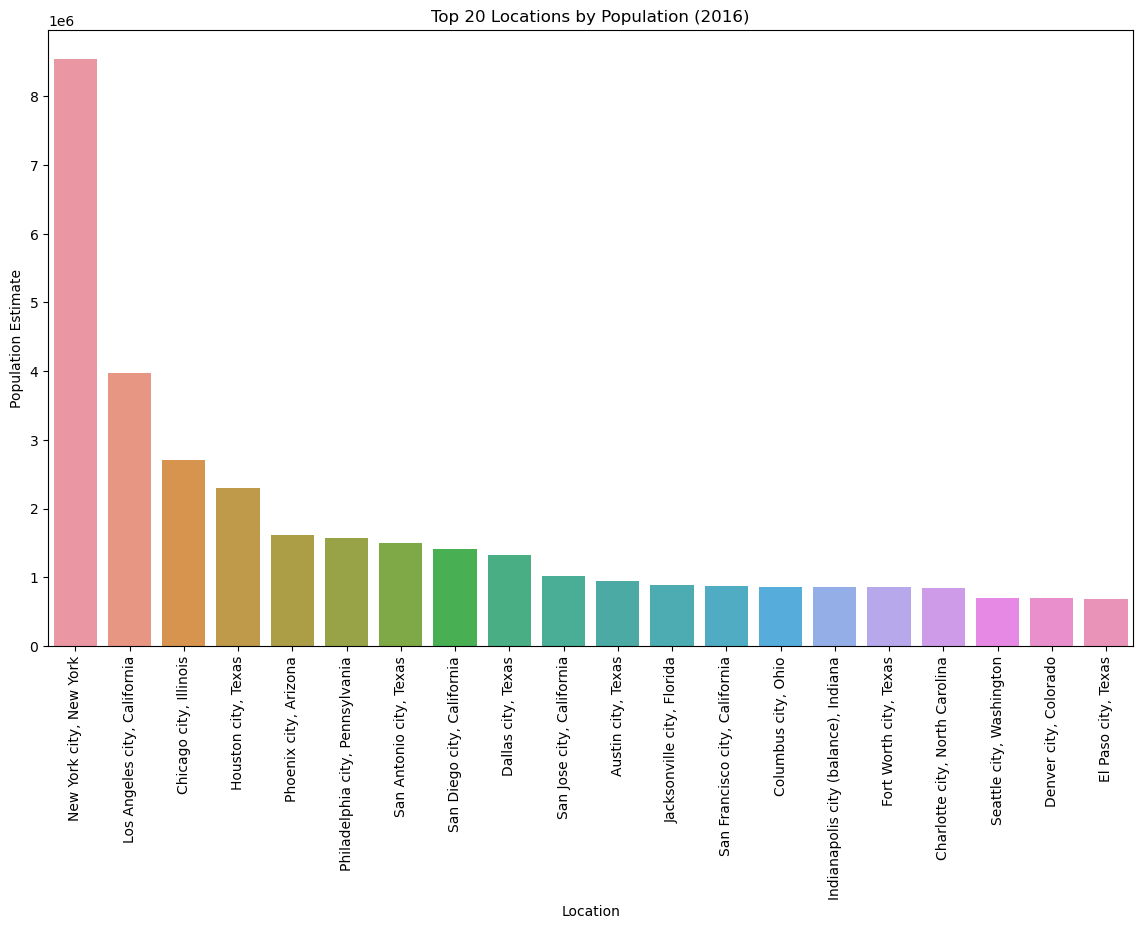

In [17]:
# Sort data by 2016 population estimate and select top N locations
top_n = 20 
top_locations = data.sort_values(by='Population Estimate (as of July 1) - 2016', ascending=False).head(top_n)
# Plot the top N locations by population
plt.figure(figsize=(14, 8))
sns.barplot(x='Geography, full name (City, State)', y='Population Estimate (as of July 1) - 2016', data=top_locations)
plt.title(f'Top {top_n} Locations by Population (2016)')
plt.xlabel('Location')
plt.ylabel('Population Estimate')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Create a 'State' column by extracting it from the 'Geography, full name (City, State)' column
data['State'] = data['Geography, full name (City, State)'].apply(lambda x: x.split(', ')[-1])
# Aggregate population by state for the year 2016
state_population = data.groupby('State')['Population Estimate (as of July 1) - 2016'].sum().reset_index()
# Sort by population in descending order for a clearer view
state_population = state_population.sort_values(by='Population Estimate (as of July 1) - 2016', ascending=False)


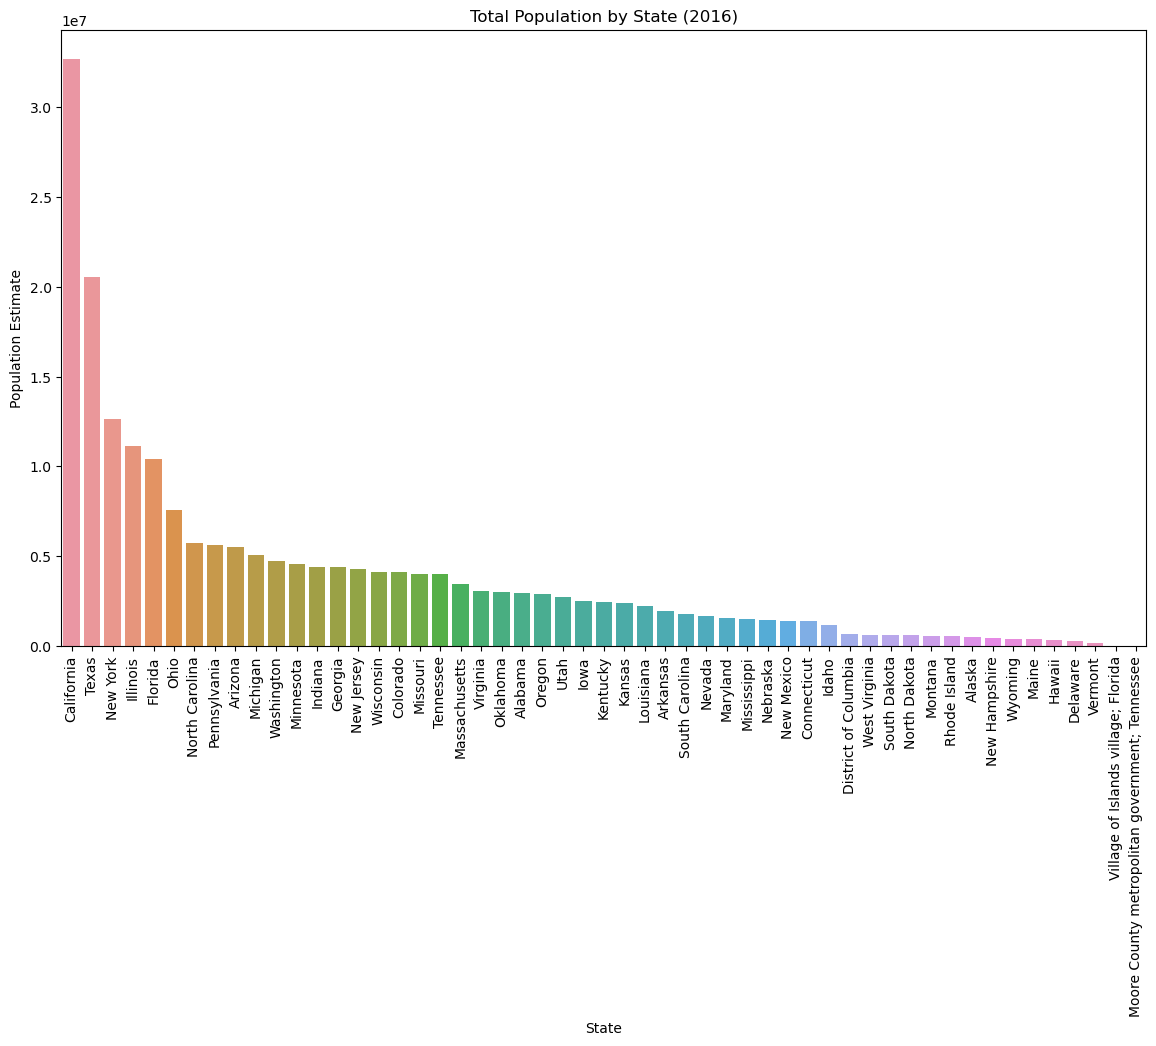

In [19]:
# Plot the state-level population distribution
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Population Estimate (as of July 1) - 2016', data=state_population)
plt.title('Total Population by State (2016)')
plt.xlabel('State')
plt.ylabel('Population Estimate')
plt.xticks(rotation=90)
plt.show()

In [20]:
# Extract state information from the 'Geography, full name (City, State)' column
data['State'] = data['Geography, full name (City, State)'].apply(lambda x: x.split(', ')[-1])
# Define columns for population estimates by year
years = [
    'Population Estimate (as of July 1) - 2010', 
    'Population Estimate (as of July 1) - 2011',
    'Population Estimate (as of July 1) - 2012', 
    'Population Estimate (as of July 1) - 2013',
    'Population Estimate (as of July 1) - 2014', 
    'Population Estimate (as of July 1) - 2015',
    'Population Estimate (as of July 1) - 2016'
]


In [21]:
# Aggregate population by state for each year
state_population = data.groupby('State')[years].sum().reset_index()
# Melt the data to long format for plotting
long_state_data = state_population.melt(
    id_vars='State', 
    value_vars=years, 
    var_name='Year', 
    value_name='Population Estimate'
)
# Extract the year part from 'Year' column
long_state_data['Year'] = long_state_data['Year'].apply(lambda x: x.split('- ')[1])



In [22]:
# Plot the interactive line chart for state-level population trends
fig = px.line(
    long_state_data, 
    x='Year', 
    y='Population Estimate', 
    color='State',
    title="State-Level Population Trends (2010-2016)"
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Population Estimate',
    legend_title_text='State',
    width=1000,
    height=600
)

fig.show()

In [23]:
columns = ['Geography, full name (City, State)', 
           'Population Estimate (as of July 1) - 2010', 
           'Population Estimate (as of July 1) - 2011',
           'Population Estimate (as of July 1) - 2012', 
           'Population Estimate (as of July 1) - 2013',
           'Population Estimate (as of July 1) - 2014', 
           'Population Estimate (as of July 1) - 2015',
           'Population Estimate (as of July 1) - 2016']



In [24]:
# Load data with only necessary columns
data = pd.read_excel("C:/Users/patha/OneDrive/Desktop/internships/vervebridge/task 2/DATASET/All Places Census 2016 Population Estimates.xlsx", usecols=columns)
# Rename columns for easier processing
data.rename(columns={
    'Geography, full name (City, State)': 'Location',
    'Population Estimate (as of July 1) - 2010': '2010',
    'Population Estimate (as of July 1) - 2011': '2011',
    'Population Estimate (as of July 1) - 2012': '2012',
    'Population Estimate (as of July 1) - 2013': '2013',
    'Population Estimate (as of July 1) - 2014': '2014',
    'Population Estimate (as of July 1) - 2015': '2015',
    'Population Estimate (as of July 1) - 2016': '2016'
}, inplace=True)

In [25]:
# Set 'Location' as index to calculate percentage change across years for each location
data.set_index('Location', inplace=True)
# Calculate the percentage change by year for each location, skipping NaN values
population_trends = data.pct_change(axis=1).fillna(0) * 100
# Show or save results (for very large datasets, consider saving to a file instead)
print("Average population change per year (%):\n", population_trends.head())
#save to a file for easy access without recalculating
population_trends.to_csv("C:/Users/patha/OneDrive/Desktop/internships/vervebridge/task 2/population_trends_percentage_change.csv")

Average population change per year (%):
                           2010      2011      2012      2013      2014  \
Location                                                                 
Abbeville city, Alabama    0.0  0.074543 -1.415270 -0.604458 -0.456100   
Adamsville city, Alabama   0.0 -0.487049 -0.511680 -0.559034 -0.427254   
Addison town, Alabama      0.0 -0.132626 -0.664011  0.000000 -0.133690   
Akron town, Alabama        0.0 -2.816901  0.000000 -0.869565 -1.461988   
Alabaster city, Alabama    0.0  0.596613  0.959760  0.938003  0.647685   

                              2015      2016  
Location                                      
Abbeville city, Alabama  -0.114548 -0.496942  
Adamsville city, Alabama -0.745257 -0.796359  
Addison town, Alabama    -0.937082 -0.270270  
Akron town, Alabama       0.000000 -0.890208  
Alabaster city, Alabama   1.815525  0.601508  


In [26]:
population_trends_long = population_trends.reset_index().melt(
    id_vars="Location", 
    var_name="Year", 
    value_name="Population Change (%)"
)
# Limit to a sample of unique locations for visualization (e.g., top 10 locations)
sample_locations = population_trends_long['Location'].unique()[:10]
population_trends_sample = population_trends_long[population_trends_long['Location'].isin(sample_locations)]

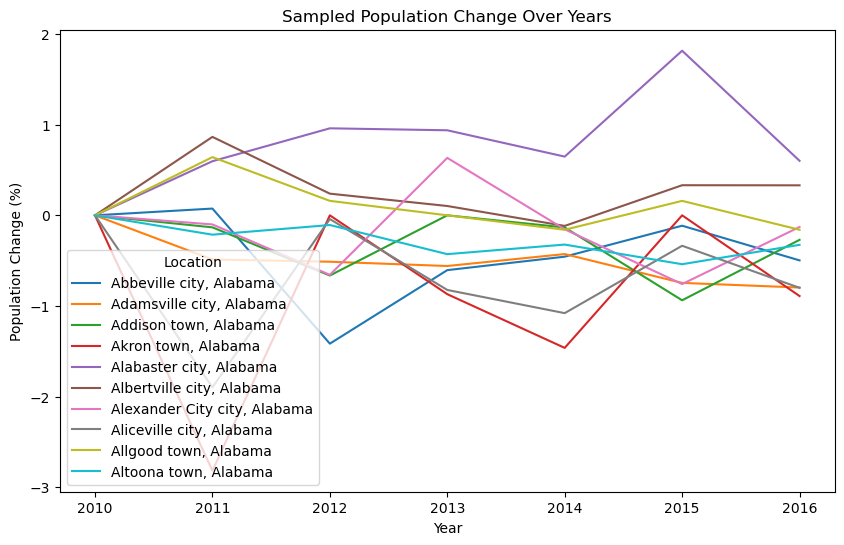

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=population_trends_sample, x="Year", y="Population Change (%)", hue="Location", dashes=False)
plt.title('Sampled Population Change Over Years')
plt.xlabel('Year')
plt.ylabel('Population Change (%)')

# Save and show the plot
plt.savefig("C:/Users/patha/OneDrive/Desktop/internships/vervebridge/task 2/population_trend.png")
plt.show()

In [34]:
# Conclusion
# -----------------------------------------------------
# This analysis provides insights into population trends among big game species across various locations over time.
# By analyzing and visualizing population data, we identified key growth patterns, declining populations, and biodiversity hotspots.
# Species like Elk and White-tailed Deer demonstrated positive trends, often in regions with strong conservation measures.
# In contrast, species such as Mule Deer and Pronghorn Antelope showed declines, especially in areas with environmental pressures.
# Notably, the Rocky Mountains and Great Plains emerged as biodiversity hotspots, highlighting the need for targeted conservation efforts.
# 
# These findings enable data-driven decisions that can prioritize conservation resources and actions, supporting the protection of vulnerable species 
# and the preservation of essential habitats.
# -----------------------------------------------------